In [1]:
import logging
from typing import List, Callable, Optional, Any

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.decomposition import PCA


from pynamics import downsample, downsample_split, avg_over, get_attractor_dimension
from pynamics.utils import np_cache, eigsort

from randnn import GaussianNN, scaling_analysis
from hoogland_masters.plotting import *


rc('text', usetex=True)
logging.basicConfig(level=logging.INFO)

# Generating random continuous-rate neural networks

First, we want to make sure that we're correctly creating our random neural networks. 

### Parameters
Change the following parameters to play with generated neural networks.

In [9]:
# Main parameters:
COUPLING_STRENGTH = 10
N_NEURONS = 1000

# The remaining parameters influence temporal resolution and trajectory duration
TIMESTEP = 0.1
N_STEPS = 100000
N_BURNIN_STEPS = 500

In [10]:
# Create a network
cont_nn = GaussianNN(coupling_strength=COUPLING_STRENGTH, n_dofs=N_NEURONS, timestep=TIMESTEP, network_seed=123)

# Generate a neural trajectory on this network
trajectory = cont_nn.run(n_steps=N_STEPS, n_burn_in=N_BURNIN_STEPS)

print(trajectory)
downsampled_trajectory = trajectory[::100, :]
print(downsampled_trajectory.shape)
# Calculate the lyapunov spectrum of this network
lyapunov_spectrum = cont_nn.get_lyapunov_spectrum(downsampled_trajectory, t_ons=100)


# Given the lyapunov spectrum, calculate the attractor dimension
print("Attractor dimension: {}".format(get_attractor_dimension(lyapunov_spectrum)))

Generating samples: 100%|██████████| 100000/100000 [02:16<00:00, 733.55it/s]
INFO:root:Saving to ./saves/trajectories/trajectory-0c337691145fc5fea4e1e1695d09bee6.npy


[[ -2.89894654  -2.1814798    2.85717211 ...   2.24225881  -4.06619484
   -3.66264344]
 [ -2.59561845  -2.31044769   3.03418553 ...   1.27465581  -4.79453793
   -3.46244992]
 [ -2.21854316  -2.3719206    3.21689358 ...   0.3797475   -5.43729539
   -3.31925141]
 ...
 [ -2.198086    -0.61816479  13.96098834 ...   8.74708041 -13.25473589
   -4.30998164]
 [ -1.93835464  -0.30693492  14.06904405 ...   8.86563065 -13.4811957
   -4.76149915]
 [ -1.66442247  -0.30759557  14.18994698 ...   8.96646521 -13.67713968
   -5.17789114]]
(1000, 1000)


Burning-in Osedelets matrix: 0it [00:00, ?it/s]
QR-Decomposition of trajectory: 1000it [00:49, 20.11it/s]
INFO:root:Saving to ./saves/lyapunov/spectrum-7c271f026cdf913fe738cec8a94a19ab.npy


Attractor dimension: 1.0


/Users/Jesse/Projects/masters-thesis/code/hoogland-masters/hoogland_masters/plotting/__init__.py:113: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = patches.Circle((0, 0),


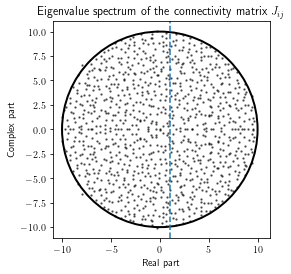

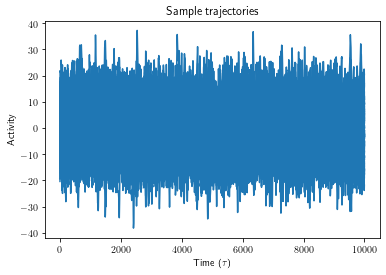

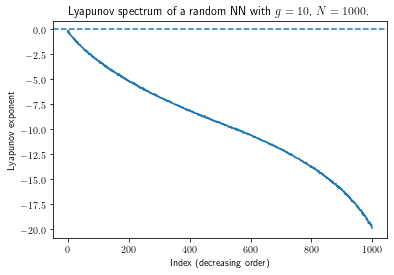

In [11]:
##### Plot the eigenvalue spectrum and make sure it respects Girko's circular law
plot_random_matrix_spectrum(cont_nn.coupling_matrix, COUPLING_STRENGTH)
plt.show()

# Plot a few sample trajectories to get visual insight to the (non-)chaotic dynamics
plot_trajectory_samples(trajectory[:10000], 100)
plt.show()

# Plot the full lyapunov spectrum (following Engelken et al. 2020)
plot_lyapunov_spectrum(lyapunov_spectrum, title="Lyapunov spectrum of a random NN with $g={}$, $N={}$.".format(COUPLING_STRENGTH, N_NEURONS))
plt.show()



In [1]:
GS = [0.8, 1.2, 1.5, 2.0, 5, 10, 20]

def trajectory_std(trajectory, *args, **kwargs): 
    return np.sort(np.std(trajectory, axis=0))[::-1]

# Just to make sure ``plot_curves_with_g`` works
plot_curves_with_g(GS, trajectory_std, n_dofs=500, n_steps=50000)


NameError: name 'plot_curves_with_g' is not defined

In [ ]:
def get_lyapunov_spectrum(trajectory, system):
    return system.get_lyapunov_spectrum(trajectory[::10])

plot_curves_with_g(GS, get_lyapunov_spectrum, n_dofs=500, n_steps=50000)
